In [1]:
import pandas as pd
import pandasql as pdsql
from pandasql import sqldf
import time 
from datetime import datetime
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options


#Ruta correspondiente
path = 'C:/Users/argea/Documents/Rafa/MDD/PF/chromedriver.exe' 



In [3]:
#Funciones auxiliares

def verificar(pro_info):
    '''
    Función auxiliar para verificar que los datos se encuentren en el orden deseado
    --------------------------------------------
    Parameters:
        pro_info: list
            Información del producto
    '''
    #Tratamos de convertir el dato del precio a flotante. Si hay error, es porque el producto tiene un título extra,
    #por lo que hay que cambiar los indices en la función principal
    precio = pro_info[1]
    precio = re.sub("[MXN$,]","",precio).split()
    try:
        temp = float(precio[0])
    except ValueError:
        return False
    
    return True



def formato(l1,l2,l3,sitio,producto):
    '''
    Función auxiliar para ordenar los datos obtenidos y generar un DataFrame
    --------------------------------------------
    Parameters:
        l1: list
            Lista con nombres de los productos
        l2: list
            Lista con precios sin descuento
        l3: list
            Lista con precios sin descuento
        sitio: str
            Nombre de la página web donde se buscó la información
        producto: str
            Tipo de producto que se consultó
    --------------------------------------------
    Returns:
        df: pandas.DataFrame()
            Dataframe con el formato deseado
    '''
    
    info = list(zip(l1,l2,l3))
    
    #Creamos dataframe y añadimos columnas importantes
    df = pd.DataFrame(info, columns=['DESCRIPCION', 'PRECIO_ACTUAL', 'PRECIO_SIN_DESCUENTO'])
    df.insert(0, "PRODUCTO", producto, allow_duplicates=False)
    df.insert(0, "SITIO", sitio, allow_duplicates=False)
    df.insert(5, "FECHA_DE_CONSULTA", datetime.today().strftime('%Y-%m-%d'), allow_duplicates=False)


 
    return df
    

In [4]:

def hym(producto):
    '''
    Función para obtener datos en sitio HyM
    --------------------------------------------------
    Parameters: 
        producto: str
            Tipo de producto que buscará en el sitio
    --------------------------------------------------
    Returns:
        df: pandas.DataFrame()
            DataFrame con la información más importante de los productos
    '''
    #Abrimos la página
    driver=webdriver.Chrome(path)
    url1 = 'https://www2.hm.com/es_mx/search-results.html?q='+producto
    driver.get(url1)
    time.sleep(12) 
    
    #Identificamos la clase de la información de los productos
    opciones = driver.find_elements_by_class_name("item-details") 
    
    #Generamos 3 listas vacías donde se añadirá la información correspondiente
    nombres = []
    precio_actual = []
    precio_sin_desc = []
    
    for i in opciones:
        pro_info = i.text.split('\n')
        
        #Si el orden es correcto, empezamos desde el primer índice a llenar los datos. Si no, desde el segundo
        if verificar(pro_info):
            nombres.append(pro_info[0])
            
            precios = pro_info[1]
            precios = re.sub("[$,]","",precios).split()
            try:
                precio_actual.append(float(precios[0]))
                precio_sin_desc.append(float(precios[1]))
            except IndexError:
                precio_sin_desc.append('NA')
                
        else:
            nombres.append(pro_info[1])   #Se agrega el nombre
    
            precios = pro_info[2]
            precios = re.sub("[$,]","",precios).split()  #Se limpia los datos de los precios
            
            #Usamos excepciones para guardar los precios 
            try:
                precio_actual.append(float(precios[0]))
                precio_sin_desc.append(float(precios[1]))
            except IndexError:
                #De no tener descuento, se llena el valor con un NA
                precio_sin_desc.append('NA')
    
    #Llamamos a la función auxiliar para generar dataframe
    df = formato(nombres, precio_actual, precio_sin_desc, 'HyM', producto)


            
    return df

hym('Gorro')

,SITIO,PRODUCTO,DESCRIPCION,PRECIO_ACTUAL,PRECIO_SIN_DESCUENTO,FECHA_DE_CONSULTA
0,HyM,Gorro,Sudadera Relaxed Fit,449.0,NA,2022-12-16
1,HyM,Gorro,Gorro con pompón,199.0,249.0,2022-12-16
2,HyM,Gorro,Gorro tejido,179.0,NA,2022-12-16
3,HyM,Gorro,Sudadera Relaxed Fit con diseño,299.0,449.0,2022-12-16
4,HyM,Gorro,Sudadera Regular Fit,549.0,NA,2022-12-16
5,HyM,Gorro,Sudadera con diseño,549.0,NA,2022-12-16
6,HyM,Gorro,Sudadera Relaxed Fit,549.0,NA,2022-12-16
7,HyM,Gorro,Sudadera oversized en tejido polar,499.0,NA,2022-12-16
8,HyM,Gorro,Sudadera Relaxed Fit,449.0,NA,2022-12-16
9,HyM,Gorro,Sudadera Oversized Fit,549.0,NA,2022-12-16


In [10]:


def bka(producto):
    '''
    Función para obtener datos en sitio Bershka
    --------------------------------------------------
    Parameters: 
        producto: str
            Tipo de producto que buscará en el sitio
    --------------------------------------------------
    Returns:
        df: pandas.DataFrame()
            DataFrame con la información más importante de los productos
    '''
    #Abrimos la página
    driver=webdriver.Chrome(path)
    url1 = 'https://www.bershka.com/mx/q/'+producto
    driver.get(url1)
    time.sleep(12) 
    
    #Identificamos clase donde se almacena la información de los productos
    opciones = driver.find_elements_by_class_name("product-content") 
    
    #Creamos listas vacías para agregar los datos
    nombres = []
    precio_actual = []
    precio_sin_desc = []
    
    for i in opciones:
        pro_info = i.text.split('\n')
        
        #Verificamos el lugar de los datos para usar índices correctos
        if verificar(pro_info):
            nombres.append(pro_info[0])  #Guardamos el nombre
            
            #Limpiamos la información del precio y la añadimos
            p_a = pro_info[1]
            p_a = re.sub("[MXN,]","",p_a)
            precio_actual.append(float(p_a))
            #Usamos excepciones para evitar errores en caso de no existir un descuento
            try:
                p_d = pro_info[2]
                p_d = re.sub("[MXN,]","",p_d)
                precio_sin_desc.append(float(p_d))
            except IndexError:
                #Si no hay descuento, se llena con un NA
                precio_sin_desc.append('NA')
            
        else:
            nombres.append(pro_info[1])  #Guardamos el nombre
            
            #Limpiamos la información del precio y la añadimos
            p_a = pro_info[2]
            p_a = re.sub("[MXN,]","",p_a)
            precio_actual.append(float(p_a))
            #Usamos excepciones para evitar errores en caso de no existir un descuento
            try:
                p_d = pro_info[3]
                p_d = re.sub("[MXN,]","",p_d)
                precio_sin_desc.append(float(p_d))
            except IndexError:
                #Si no hay descuento, se llena con un NA
                precio_sin_desc.append('NA')
                
                
    #Llamamos a la función auxiliar para generar dataframe
    df = formato(nombres, precio_actual, precio_sin_desc, 'Bershka', producto)


            
    return df

bka('Camisa')

,SITIO,PRODUCTO,DESCRIPCION,PRECIO_ACTUAL,PRECIO_SIN_DESCUENTO,FECHA_DE_CONSULTA


In [9]:


def shn(producto):
    '''
    Función para obtener datos en sitio Forever 21
    --------------------------------------------------
    Parameters: 
        producto: str
            Tipo de producto que buscará en el sitio
    --------------------------------------------------
    Returns:
        df: pandas.DataFrame()
            DataFrame con la información más importante de los productos        
    '''
    driver=webdriver.Chrome(path)
    url1 = 'https://www.shein.com.mx/pdsearch/'+producto+'/?ici=s1`EditSearch`'+producto+'`_fb`d0`PageHome&scici=Search~~EditSearch~~1~~'+producto+'~~~~0&src_identifier=st%3D2%60sc%3Dcamisa%60sr%3D0%60ps%3D1&src_module=search&src_tab_page_id=page_home1671052514149'
    driver.get(url1)
    time.sleep(12) 
    
    opciones = driver.find_elements_by_class_name("S-product-item__info") 
    
    nombres = []
    precio_actual = []
    precio_sin_desc = []
    
    for i in opciones:
        pro_info = i.text.split('\n')
        
        #Verificamos que el orden de los datos sea correcto
        if verificar(pro_info):
            nombres.append(pro_info[0])

            p_a = pro_info[1]
            p_a = re.sub("[$MXN,]","",p_a)
            precio_actual.append(float(p_a))

            try:
                p_d = pro_info[2]
                p_d = re.sub("[$MXN,]","",p_d)
                precio_sin_desc.append(float(p_d))
            except:
                precio_sin_desc.append('NA')
        
        else:
            nombres.append(pro_info[1])

            p_a = pro_info[2]
            p_a = re.sub("[$MXN,]","",p_a)
            precio_actual.append(float(p_a))

            try:
                p_d = pro_info[3]
                p_d = re.sub("[$MXN,]","",p_d)
                precio_sin_desc.append(float(p_d))
            except IndexError:
                precio_sin_desc.append('NA')
        
    #Llamamos a la función auxiliar para generar dataframe  
    df = formato(nombres, precio_actual, precio_sin_desc, 'Shein', producto)

    
    
    
    return df

shn('Blusa')

,SITIO,PRODUCTO,DESCRIPCION,PRECIO_ACTUAL,PRECIO_SIN_DESCUENTO,FECHA_DE_CONSULTA
0,Shein,Blusa,SHEIN BAE Camis Asimétrico Liso Sexy,70.0,73.0,2022-12-16
1,Shein,Blusa,SHEIN SXY Blusa de manga gigot cruzado con cor...,216.0,NA,2022-12-16
2,Shein,Blusa,DAZY Blusa con diseño de parche de letra irreg...,354.0,NA,2022-12-16
3,Shein,Blusa,Top corto con mangas de campana y cruzado en l...,245.0,NA,2022-12-16
4,Shein,Blusa,SHEIN Top unicolor de espalda girante,181.0,NA,2022-12-16
...,...,...,...,...,...,...
115,Shein,Blusa,Camisa de cintura fruncido con estampado flora...,261.0,NA,2022-12-16
116,Shein,Blusa,Blusa con estampado de manga a capas,178.0,2.0,2022-12-16
117,Shein,Blusa,SHEIN Top de malla transparente con estampado ...,178.0,NA,2022-12-16
118,Shein,Blusa,Camisa corta con estampado floral de manga far...,231.0,NA,2022-12-16


In [111]:

def main_excel(lis_productos):
    '''
    Función que genera un archivo de excel con la información de una lista de productos
    en los sitios: HyM, Bershka y Shein
    ---------------------------------------------------
    Parameters:
        lis_productos: list
            Lista con productos que se desea analizar
    '''
    #Creamos 3 dataframes donde se guardarán la información de cada búsqueda
    df1 = pd.DataFrame()
    for i in lis_productos: 
        t = hym(i)
        df1 = pd.concat([df1, t])
    
    df2 = pd.DataFrame()
    for i in lis_productos: 
        t = bka(i)
        df2 = pd.concat([df2, t])
    
    df3 = pd.DataFrame()
    for i in lis_productos: 
        t = shn(i)
        df3 = pd.concat([df3, t])
    
    #Al finalizar los ciclos, unimos todos los dataframes y ajustamos índices
    df_final = pd.DataFrame()
    df_final = pd.concat([df1,df2,df3])
    df_final.index = range(df_final.shape[0])

    #Guardamos un archivo de excel con la información obtenida
    df_final.to_excel('Proyecto.xlsx')
    






In [112]:
#Sección para buscar productos. Tarda un poco en terminar de ejecutarse
#Al finalizar, guarda un archivo de excel en la misma carpeta de este programa

busqueda = ['Camisa', 'Falda', 'Sueter']
main_excel(busqueda)

In [113]:
#Abrimos archivo para comprobar que se guardó correctamente

archivo = 'C:/Users/argea/Documents/Rafa/MDD/PF/Proyecto.xlsx'
DF1 = pd.read_excel(archivo)
DF1

,Unnamed: 0,SITIO,PRODUCTO,DESCRIPCION,PRECIO_ACTUAL,PRECIO_SIN_DESCUENTO,FECHA_DE_CONSULTA
0,0,HyM,Camisa,Sobrecamisa Regular Fit,329,429.0,2022-12-16
1,1,HyM,Camisa,Camisa Slim Fit Easy-iron,249,399.0,2022-12-16
2,2,HyM,Camisa,Camisa Relaxed Fit en sarga,329,449.0,2022-12-16
3,3,HyM,Camisa,Chamarra camisa,899,NaN,2022-12-16
4,4,HyM,Camisa,Sobrecamisa recubierta,599,NaN,2022-12-16
...,...,...,...,...,...,...,...
655,655,Shein,Sueter,DAZY Jersey unicolor tejido de canalé,298,8.0,2022-12-16
656,656,Shein,Sueter,DAZY Jersey de rayas de manga raglán,502,NaN,2022-12-16
657,657,Shein,Sueter,Jersey de color combinado de hombros caídos,417,NaN,2022-12-16
658,658,Shein,Sueter,Jersey de hombros caídos con patrón de estrella,500,1.0,2022-12-16


In [114]:
#Notamos que hay errores en el sitio Shein. 
#Lo corregimos manualmente.

#Hacemos copia del dataframe generado
df_aux = DF1.copy()

#Identificamos filas con datos erróneos
errores = df_aux.loc[(df_aux['SITIO'] == 'Shein') & (df_aux['PRECIO_SIN_DESCUENTO'].notnull())]
errores = errores.loc[errores['PRECIO_ACTUAL'] > errores['PRECIO_SIN_DESCUENTO'] ]

#Guardamos lista con datos a remplazar
mod = list(set(list(errores['PRECIO_SIN_DESCUENTO'])))

mod


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0]

In [115]:
DF = DF1.copy()
DF['PRECIO_SIN_DESCUENTO']= DF1['PRECIO_SIN_DESCUENTO'].replace(mod,np.nan)

DF

,Unnamed: 0,SITIO,PRODUCTO,DESCRIPCION,PRECIO_ACTUAL,PRECIO_SIN_DESCUENTO,FECHA_DE_CONSULTA
0,0,HyM,Camisa,Sobrecamisa Regular Fit,329,429.0,2022-12-16
1,1,HyM,Camisa,Camisa Slim Fit Easy-iron,249,399.0,2022-12-16
2,2,HyM,Camisa,Camisa Relaxed Fit en sarga,329,449.0,2022-12-16
3,3,HyM,Camisa,Chamarra camisa,899,NaN,2022-12-16
4,4,HyM,Camisa,Sobrecamisa recubierta,599,NaN,2022-12-16
...,...,...,...,...,...,...,...
655,655,Shein,Sueter,DAZY Jersey unicolor tejido de canalé,298,NaN,2022-12-16
656,656,Shein,Sueter,DAZY Jersey de rayas de manga raglán,502,NaN,2022-12-16
657,657,Shein,Sueter,Jersey de color combinado de hombros caídos,417,NaN,2022-12-16
658,658,Shein,Sueter,Jersey de hombros caídos con patrón de estrella,500,NaN,2022-12-16


In [116]:
#Reescribimos el excel generado por el dataframe corregido
DF.to_excel('Proyecto.xlsx')

In [117]:
# --------------   CONSULTAS   ----------------

#Ya tenemos guardado el dataframe principal como 'DF', por lo que no es necesario leer de nuevo el excel

#--- 1. Número de faldas
num_faldas = pdsql.sqldf("SELECT count(PRODUCTO), SITIO FROM DF WHERE PRODUCTO = 'Falda' GROUP BY SITIO, PRODUCTO")
num_faldas

,count(PRODUCTO),SITIO
0,64,Bershka
1,36,HyM
2,120,Shein


In [119]:
#--- 2. Número de suéteres 
num_sueteres = pdsql.sqldf("SELECT count(PRODUCTO), SITIO FROM DF WHERE PRODUCTO = 'Sueter' GROUP BY SITIO, PRODUCTO")
num_sueteres

,count(PRODUCTO),SITIO
0,64,Bershka
1,36,HyM
2,120,Shein


In [120]:
# ---3. Número de Camisas
num_camisas = pdsql.sqldf("SELECT count(PRODUCTO), SITIO FROM DF WHERE PRODUCTO = 'Camisa' GROUP BY SITIO, PRODUCTO")
num_camisas

,count(PRODUCTO),SITIO
0,64,Bershka
1,36,HyM
2,120,Shein


In [124]:
# ---4. Precio más bajo para suéteres de Shein, Bershka y HyM
min_p_s = pdsql.sqldf("SELECT MIN(PRECIO_ACTUAL), SITIO FROM DF WHERE PRODUCTO = 'Sueter' Group by SITIO")
min_p_s

,MIN(PRECIO_ACTUAL),SITIO
0,279,Bershka
1,129,HyM
2,189,Shein


In [125]:
# ---5. Precio más bajo para Camisas de Shein, Bershka y HyM
min_p_c = pdsql.sqldf("SELECT MIN(PRECIO_ACTUAL), SITIO FROM DF WHERE PRODUCTO = 'Camisa' Group by SITIO")
min_p_c

,MIN(PRECIO_ACTUAL),SITIO
0,299,Bershka
1,249,HyM
2,140,Shein


In [126]:
# ---6. Precio más bajo para faldas de Shein, Bershka y HyM
min_p_f = pdsql.sqldf("SELECT MIN(PRECIO_ACTUAL), SITIO FROM DF WHERE PRODUCTO = 'Falda' Group by SITIO")
min_p_f

,MIN(PRECIO_ACTUAL),SITIO
0,349,Bershka
1,179,HyM
2,95,Shein


In [127]:
#---7. ¿Qué cantidad de productos tienen descuentos?

consulta ="SELECT count(PRECIO_SIN_DESCUENTO), SITIO FROM DF WHERE NOT PRECIO_SIN_DESCUENTO = 'NaN' Group by SITIO"
descuentos = pdsql.sqldf(consulta)
descuentos

,count(PRECIO_SIN_DESCUENTO),SITIO
0,28,Bershka
1,46,HyM
2,37,Shein


In [128]:
#---8. Precio promedio de productos por Sitio
prom = pdsql.sqldf("SELECT avg(PRECIO_ACTUAL), SITIO FROM DF GROUP BY SITIO")
prom

,avg(PRECIO_ACTUAL),SITIO
0,634.234375,Bershka
1,418.814815,HyM
2,347.975000,Shein


In [129]:
#---9. Precio promedio de productos sin descuentos por marca
prom_sin = pdsql.sqldf("SELECT avg(PRECIO_SIN_DESCUENTO), SITIO FROM DF WHERE  NOT PRECIO_SIN_DESCUENTO = 'NaN' GROUP BY SITIO")
prom_sin

,avg(PRECIO_SIN_DESCUENTO),SITIO
0,697.214286,Bershka
1,400.956522,HyM
2,302.108108,Shein


In [130]:
#---10. Precio más alto de productos por marca
max_p = pdsql.sqldf("SELECT max(PRECIO_ACTUAL), SITIO FROM DF GROUP BY SITIO")
max_p


,max(PRECIO_ACTUAL),SITIO
0,2499,Bershka
1,1499,HyM
2,1459,Shein


Camisa    220
Falda     220
Sueter    220
Name: PRODUCTO, dtype: int64

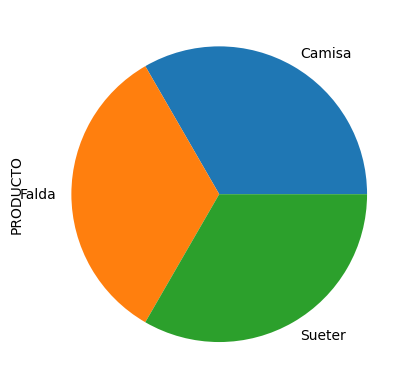

In [147]:
# -------------- GRÁFICAS ---------------

#GRAFICO 1: CANTIDAD TOTAL DE CADA TIPO DE PRODUCTOS 

#Guadramos la columna de productos en serie10 y al aplicarle counts me indica cuantos registros hay de 
#cada categoria de productos
serie1 = DF.PRODUCTO.value_counts()
serie1.plot.pie()
serie1

<AxesSubplot:title={'center':'Productos en HyM'}>

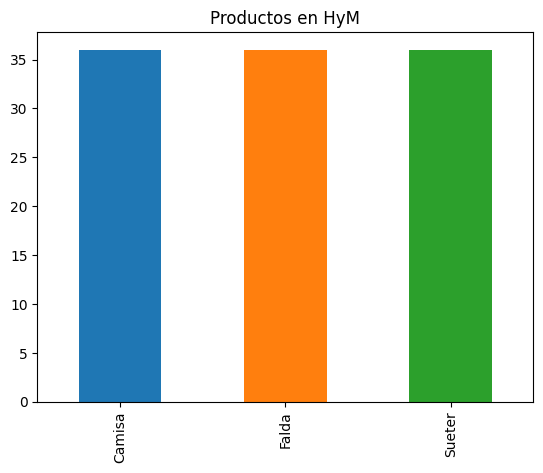

In [183]:
#GRAFICO 2: CANTIDAD DE CADA TIPO DE PRODUCTOS EN HyM

#Seleccionamos los renglones, de la columna de sitio pero solo aquellas que correspondan al sitio HyM
df2 = DF.loc[DF['SITIO']== 'HyM']


#Seleccionamos la quinta columna (PRODUCTO) del df2 y los cuenta, es decir estamos encontrando 
#la cantidad de cada tipo de producto de HyM
my_colors = 'brg'
plt.title('Productos en HyM')

serie2 = df2.PRODUCTO.value_counts()
serie2.plot.bar(color=['tab:blue', 'tab:orange', 'tab:green'])



Camisa    64
Falda     64
Sueter    64
Name: PRODUCTO, dtype: int64

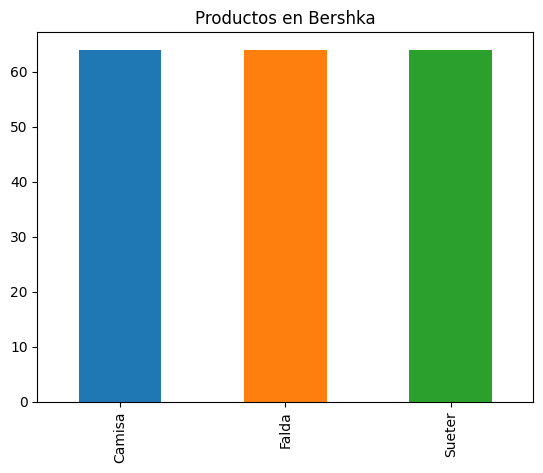

In [184]:
#GRAFICO 3: CANTIDAD DE CADA TIPO DE PRODUCTOS EN BERSHKA

#Seleccionamos los renglones, de la columna de sitio pero solo aquellas que correspondan al sitio Bershka
df3 = DF.loc[DF['SITIO']== 'Bershka']


#Seleccionamos la quinta columna (PRODUCTO) del df3 y los cuenta, es decir estamos encontrando 
#la cantidad de cada tipo de producto de Bershka
plt.title('Productos en Bershka')

serie3 = df3.PRODUCTO.value_counts()
serie3.plot.bar(color=['tab:blue', 'tab:orange', 'tab:green'])
serie3

Camisa    120
Falda     120
Sueter    120
Name: PRODUCTO, dtype: int64

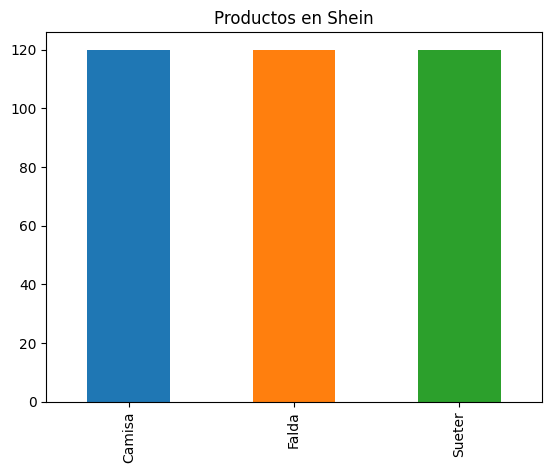

In [185]:
#GRAFICO 4: CANTIDAD DE CADA TIPO DE PRODUCTOS EN SHEIN

#Seleccionamos los renglones, de la columna de sitio pero solo aquellas que correspondan al sitio Shein
df4 = DF.loc[DF['SITIO']== 'Shein']
df4

#Seleccionamos la quinta columna (PRODUCTO) del df4 y los cuenta, es decir estamos encontrando 
#la cantidad de cada tipo de producto de Shein 
plt.title('Productos en Shein')

serie4 = df4.PRODUCTO.value_counts()
serie4.plot.bar(color=['tab:blue', 'tab:orange', 'tab:green'])
serie4

<AxesSubplot:title={'center':'Costo de camisas en HyM'}, ylabel='Density'>

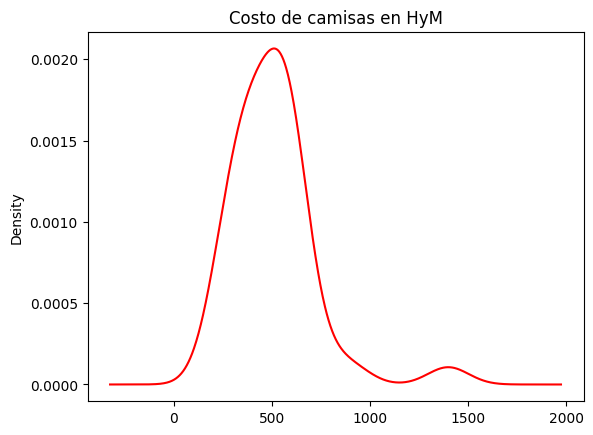

In [202]:
#GRAFICO 5: NOS INDICA EL PROMEDIO DE COSTOS


#CAMISAS
df5_c1 = DF.loc[(DF['SITIO']=='HyM') & (DF['PRODUCTO']== 'Camisa')]
plt.title('Costo de camisas en HyM')
df5_c1.PRECIO_ACTUAL.plot.density(color='red')

<AxesSubplot:title={'center':'Costo de camisas en Bershka'}, ylabel='Density'>

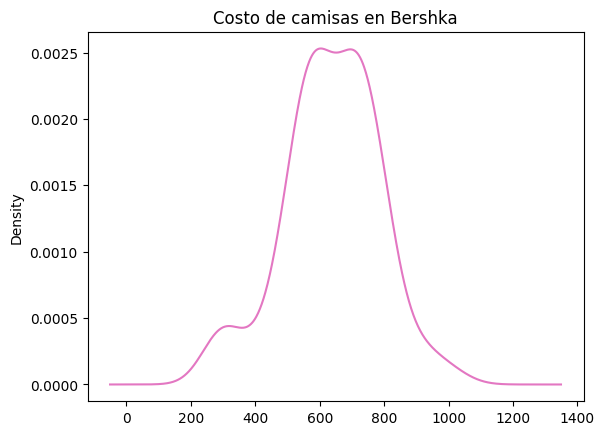

In [192]:
df5_c2 = DF.loc[(DF['SITIO']=='Bershka') & (DF['PRODUCTO']== 'Camisa')]
plt.title('Costo de camisas en Bershka')

df5_c2.PRECIO_ACTUAL.plot.density(color='tab:pink')

<AxesSubplot:title={'center':'Costo de camisas en Shein'}, ylabel='Density'>

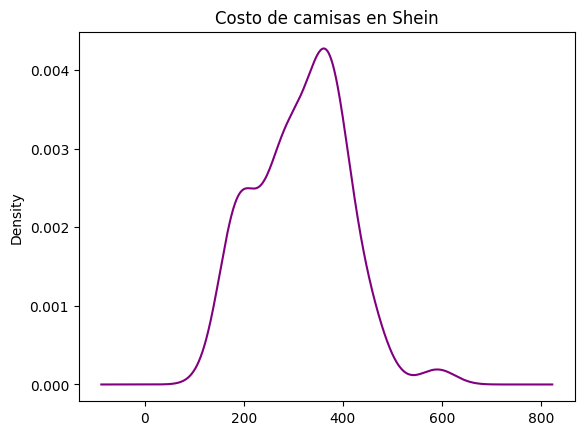

In [198]:
df5_c3 = DF.loc[(DF['SITIO']=='Shein') & (DF['PRODUCTO']== 'Camisa')]
plt.title('Costo de camisas en Shein')

df5_c3.PRECIO_ACTUAL.plot.density(color='purple')

<AxesSubplot:title={'center':'Costo de camisas en HyM'}, ylabel='Density'>

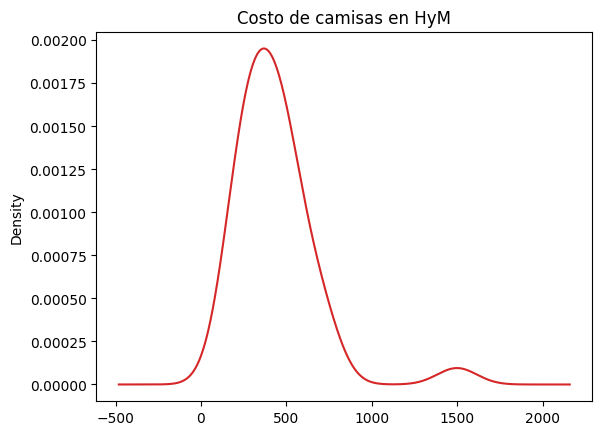

In [195]:
#Faldas
df5_f1 = DF.loc[(DF['SITIO']=='HyM') & (DF['PRODUCTO']== 'Falda')]
plt.title('Costo de camisas en HyM')

df5_f1.PRECIO_ACTUAL.plot.density(color='red')

<AxesSubplot:title={'center':'Costo de camisas en Bershka'}, ylabel='Density'>

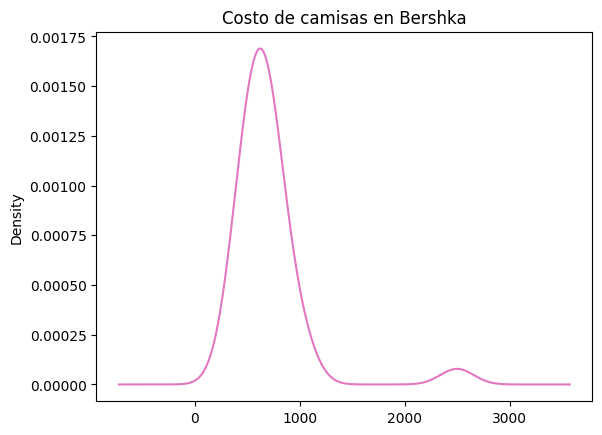

In [201]:
df5_f2 = DF.loc[(DF['SITIO']=='Bershka') & (DF['PRODUCTO']== 'Falda')]
plt.title('Costo de camisas en Bershka')

df5_f2.PRECIO_ACTUAL.plot.density(color='tab:pink')

<AxesSubplot:title={'center':'Costo de camisas en Shein'}, ylabel='Density'>

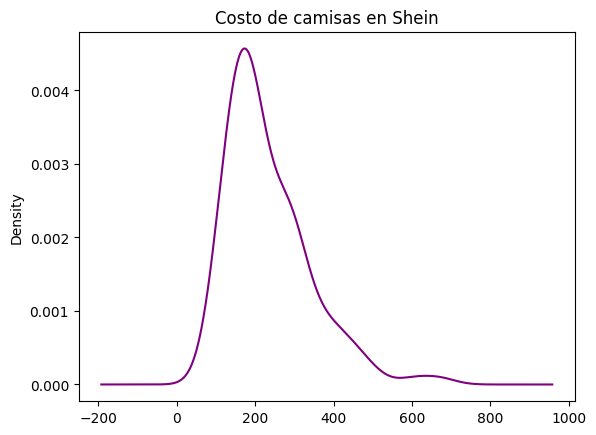

In [197]:
df5_f3 = DF.loc[(DF['SITIO']=='Shein') & (DF['PRODUCTO']== 'Falda')]
plt.title('Costo de camisas en Shein')

df5_f3.PRECIO_ACTUAL.plot.density(color='purple')

<AxesSubplot:title={'center':'Costo de camisas en HyM'}, ylabel='Density'>

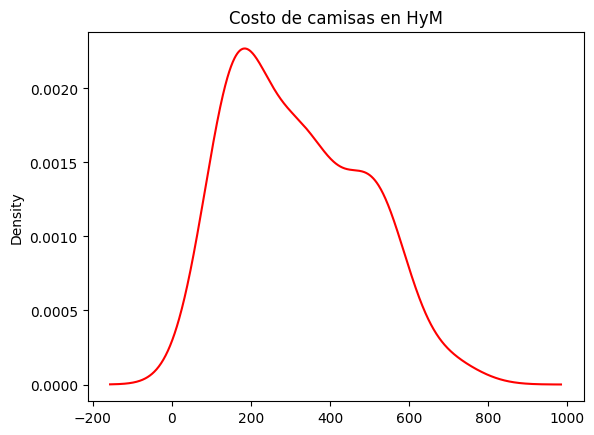

In [199]:
#Suéteres
df5_s1 = DF.loc[(DF['SITIO']=='HyM') & (DF['PRODUCTO']== 'Sueter')]
plt.title('Costo de camisas en HyM')

df5_s1.PRECIO_ACTUAL.plot.density(color='red')

<AxesSubplot:title={'center':'Costo de camisas en Bershka'}, ylabel='Density'>

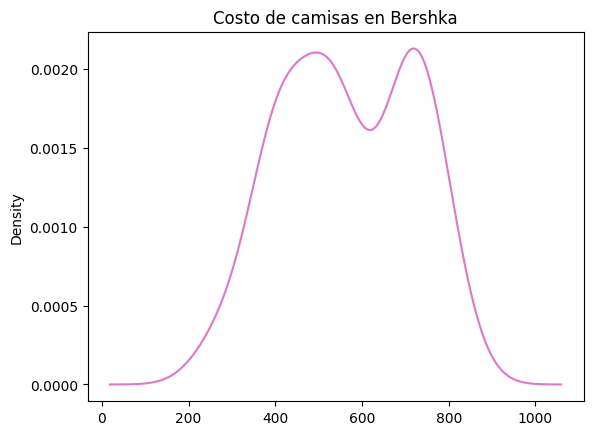

In [203]:
df5_s2 = DF.loc[(DF['SITIO']=='Bershka') & (DF['PRODUCTO']== 'Sueter')]
plt.title('Costo de camisas en Bershka')

df5_s2.PRECIO_ACTUAL.plot.density(color='tab:pink')

<AxesSubplot:title={'center':'Costo de camisas en Shein'}, ylabel='Density'>

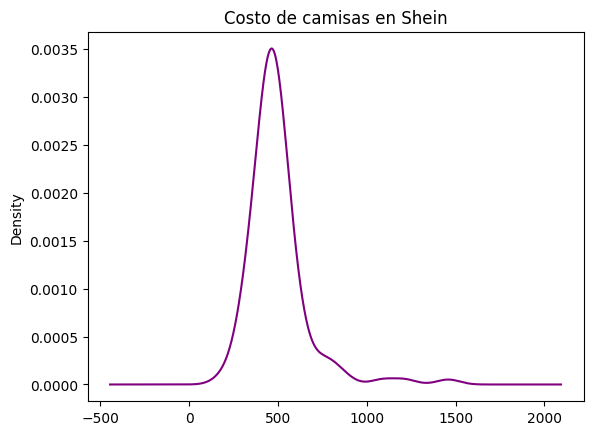

In [204]:
df5_s3 = DF.loc[(DF['SITIO']=='Shein') & (DF['PRODUCTO']== 'Sueter')]
plt.title('Costo de camisas en Shein')

df5_s3.PRECIO_ACTUAL.plot.density(color='purple')

,Unnamed: 0,SITIO,PRODUCTO,DESCRIPCION,PRECIO_ACTUAL,PRECIO_SIN_DESCUENTO,FECHA_DE_CONSULTA
36,36,HyM,Falda,Vestido con falda de tul,199,349.0,2022-12-16
37,37,HyM,Falda,Vestido con falda de tul,199,349.0,2022-12-16
38,38,HyM,Falda,Vestido con falda de tul,199,299.0,2022-12-16
39,39,HyM,Falda,Falda de satín con aberturas,249,449.0,2022-12-16
40,40,HyM,Falda,Minifalda,399,NaN,2022-12-16
...,...,...,...,...,...,...,...
535,535,Shein,Falda,SHEIN VCAY Conjunto top corto sujetador de cua...,185,NaN,2022-12-16
536,536,Shein,Falda,SHEIN VCAY Falda floral ribete con fruncido cr...,297,NaN,2022-12-16
537,537,Shein,Falda,SHEIN Falda bajo con abertura con estampado fl...,193,NaN,2022-12-16
538,538,Shein,Falda,SHEIN MOD Camiseta con patrón de rombo de cuel...,441,NaN,2022-12-16


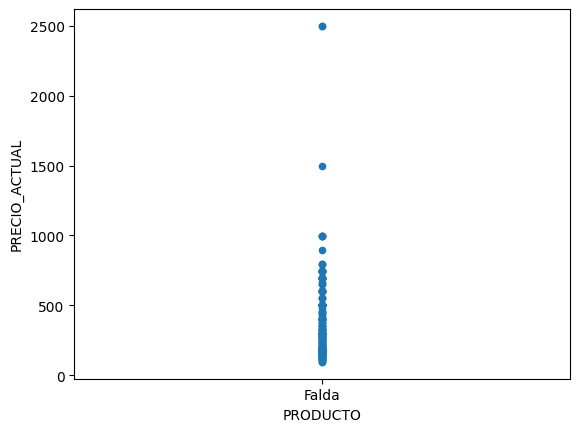

In [140]:
#GRAFICO 6: NOS INDICA EL PRECIO MAS BAJO PARA LAS FALDAS

df6 = DF.loc[DF['PRODUCTO']== 'Falda' ]
df6.plot.scatter(x = 'PRODUCTO', y = 'PRECIO_ACTUAL')
df6

#En la grafica podemos. ver que la mayoria de los precios de las faldas se acumulan entre 100 y 500


,Unnamed: 0,SITIO,PRODUCTO,DESCRIPCION,PRECIO_ACTUAL,PRECIO_SIN_DESCUENTO,FECHA_DE_CONSULTA
36,36,HyM,Falda,Vestido con falda de tul,199,349.0,2022-12-16
37,37,HyM,Falda,Vestido con falda de tul,199,349.0,2022-12-16
38,38,HyM,Falda,Vestido con falda de tul,199,299.0,2022-12-16
42,42,HyM,Falda,Falda de tul con brillos,179,299.0,2022-12-16
59,59,HyM,Falda,Vestido tejido con abertura,199,429.0,2022-12-16
...,...,...,...,...,...,...,...
531,531,Shein,Falda,SHEIN Tall Falda bajo con abertura de rayas de...,131,NaN,2022-12-16
532,532,Shein,Falda,SHEIN Faldas Extra Grande Partición A cuadros ...,151,NaN,2022-12-16
533,533,Shein,Falda,Falda con estampado de lunares con cordón late...,199,NaN,2022-12-16
535,535,Shein,Falda,SHEIN VCAY Conjunto top corto sujetador de cua...,185,NaN,2022-12-16


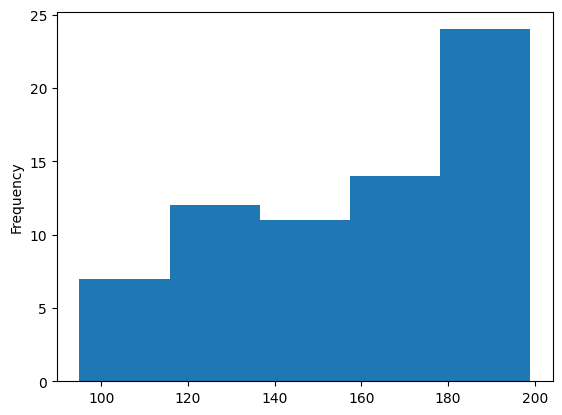

In [141]:
#SEGUNDA PARTE DE LA GRAFICA 6:
 
#Una vez vista la moda del precio de las faldas, encontraremos los precios mas bajos 

#Seleccionamos las faldas que estan por debajo de la moda
df6_1 = df6.loc[DF['PRECIO_ACTUAL'] < 200 ]

#Hacemos el grafico
df6_1.PRECIO_ACTUAL.plot.hist(bins=5)
df6_1


#Por el grafico nos podemos dar cuenta que los precios mas bajos estan entre 100 y un poco menos 

299.0    8
449.0    7
229.0    7
549.0    6
429.0    5
349.0    4
499.0    3
699.0    2
399.0    1
599.0    1
329.0    1
249.0    1
Name: PRECIO_SIN_DESCUENTO, dtype: int64

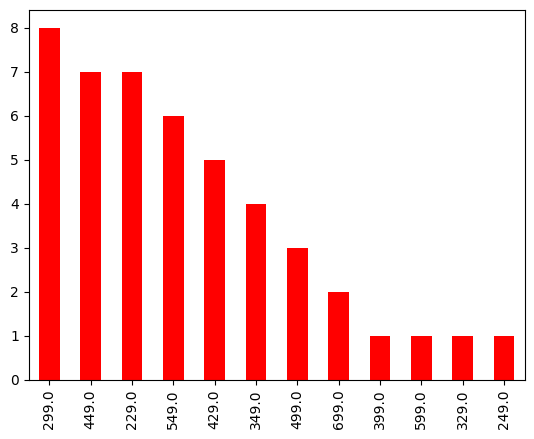

In [211]:
#GRAFICO 7: CANTIDAD DE PRODUCTOS CON DESCUENTO EN HyM

##Seleccionamos los renglones, de la columna de sitio pero solo aquellas que correspondan al sitio HyM
df7 = DF.loc[DF['SITIO']== 'HyM']

#Seleccionamos la quinta columna (PRECIO_SIN_DESCUENTO) del df7 y los cuenta, es decir estamos encontrando 
#la cantidad de productos de HyM que se les aplico descuento 
serie7 = df7.iloc[:,5].value_counts() 
serie7.plot.bar(color='r')
serie7

699.0     10
749.0      5
599.0      4
399.0      3
1299.0     2
499.0      2
799.0      2
Name: PRECIO_SIN_DESCUENTO, dtype: int64

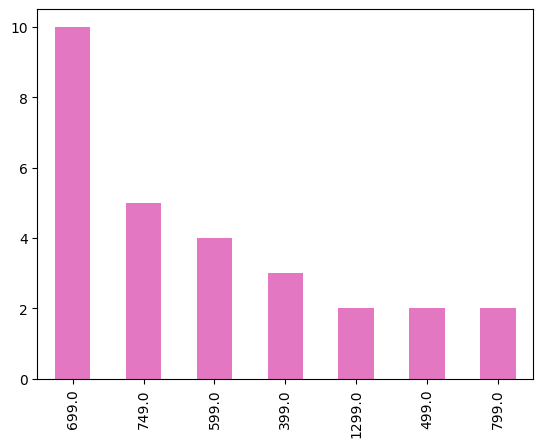

In [207]:
#GRAFICO 8: CANTIDAD DE PRODUCTOS CON DESCUENTO EN BERSHKA

#Seleccionamos los renglones, de la columna de sitio pero solo aquellas que correspondan al sitio Bershka
df8 = DF.loc[DF['SITIO']== 'Bershka']
df8

#Seleccionamos la quinta columna (PRECIO_SIN_DESCUENTO) del df8 y los cuenta, es decir estamos encontrando 
#la cantidad de productos de Bershka que se les aplico descuento 
serie8 = df8.iloc[:,5].value_counts() 
serie8.plot.bar(color='tab:pink')
serie8

360.0    2
367.0    2
188.0    2
402.0    1
192.0    1
260.0    1
100.0    1
167.0    1
193.0    1
389.0    1
181.0    1
159.0    1
180.0    1
104.0    1
418.0    1
590.0    1
477.0    1
103.0    1
282.0    1
384.0    1
623.0    1
408.0    1
203.0    1
196.0    1
147.0    1
284.0    1
369.0    1
301.0    1
364.0    1
292.0    1
413.0    1
285.0    1
424.0    1
458.0    1
Name: PRECIO_SIN_DESCUENTO, dtype: int64

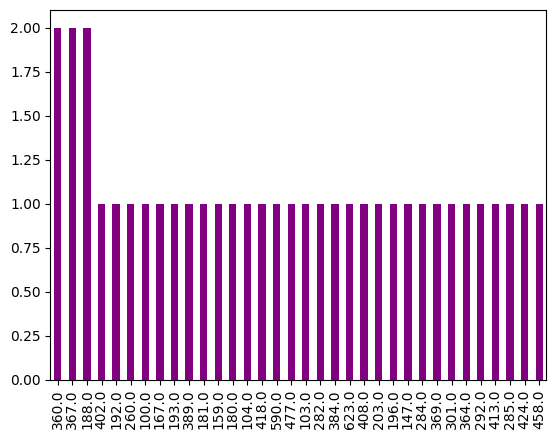

In [208]:
#GRAFICO 9: CANTIDAD DE PRODUCTOS CON DESCUENTO EN SHEIN

#Seleccionamos los renglones, de la columna de sitio pero solo aquellas que correspondan al sitio Shein
df9 = DF.loc[DF['SITIO']== 'Shein']
df9

#Seleccionamos la quinta columna (PRECIO_SIN_DESCUENTO) del df9 y los cuenta, es decir estamos encontrando 
#la cantidad de productos de Shein que se les aplico descuento 
serie9 = df9.iloc[:,5].value_counts() 
serie9.plot.bar(color='purple')
serie9